In [18]:
from sklearn.model_selection import train_test_split
import openpyxl
import numpy as np
import sys
sys.path.append('../')  
from DE import DifferentialEvolution
from PSO import ParticleSwarmOptimizer
import matplotlib.pyplot as plt

In [56]:
def plot_fitness(best_fitnesses):
    plt.figure()
    plt.plot(np.arange(len(best_fitnesses)), best_fitnesses, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolution of Best Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()

In [81]:
wb = openpyxl.load_workbook('TestRegData.xlsx')
sheet = wb['Var7']

max_row = sheet.max_row
max_col = sheet.max_column

X_data = []
y_data = []


for col in range(1, max_col + 1):
    column_data = [sheet.cell(row=row, column=col).value for row in range(1, max_row + 1)]
    
    if col == max_col:
        y_data = column_data
    else:
        X_data.append(column_data)


X = np.array(X_data).T[1:]
y = np.array(y_data)[1:]

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (961, 15)
Shape of y: (961,)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (720, 15)
Shape of y_train: (720,)
Shape of X_test: (241, 15)
Shape of y_test: (241,)


Best solution : [ 5.32108651 -5.28897227  1.04318664  4.27654737  0.91618469  0.05997824
 -1.94374892 -3.21164211  1.92909474  4.94263319  5.25157711  0.99598513
 -0.91708482  1.2305841   3.1753811 ]
Best fitness: 1521.7640248178695


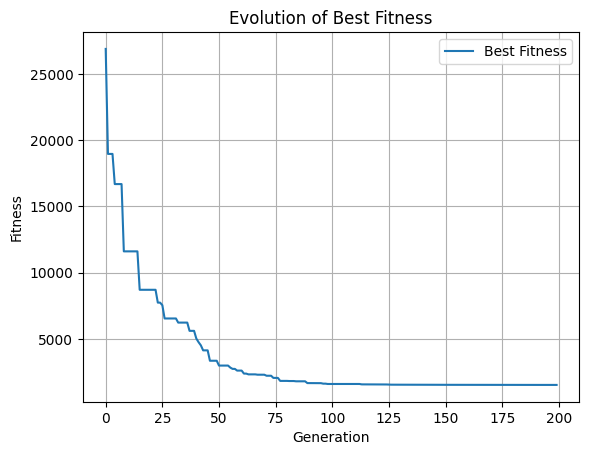

In [58]:
def objective_function(a, gamma=0.0005):
    result = 0
    for i in range(1, len(X_train)):
        #result += (y_train[i] - (a[0] + sum([a[j]*X_train[i][j] for j in range(len(X_train[i]))])))**2 
        tmp = float(y_train[i]) - a[0]
        for j in range(1, len(a)):
            tmp -= (a[j] * float(X_train[i][j]))

        result += tmp**2

    result += gamma*sum([a[i]**2 for i in range(len(a))])

    return result


bounds = np.array([[-10, 10] for _ in range(15)])
de = DifferentialEvolution(objective_function=objective_function, bounds=bounds, epochs=200)

best_solution, best_fitness = de.fit()
print("Best solution :", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()


Best solution : [ 5.37827941 -5.27777624  1.13925192  4.18163606  0.83788114  0.02454137
 -1.99030272 -3.16968241  2.04999703  4.89388835  5.19840624  0.97460726
 -0.94023364  1.22656679  3.22276019]
Best fitness: 1523.9129943369699


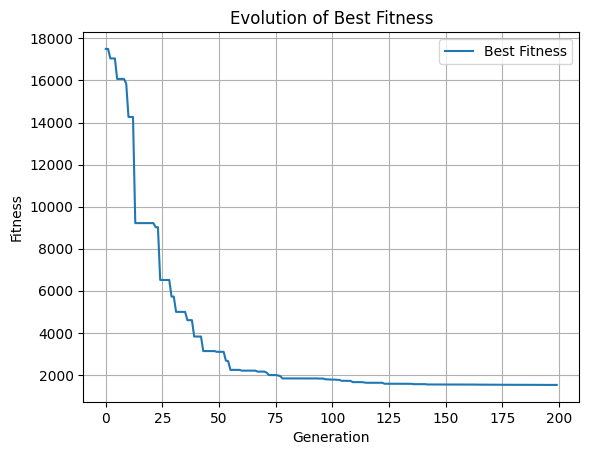

In [59]:
def objective_function(a, gamma=0.0005):
    result = 0
    for i in range(1, len(X_train)):
        #result += (y_train[i] - (a[0] + sum([a[j]*X_train[i][j] for j in range(len(X_train[i]))])))**2 
        tmp = float(y_train[i]) - a[0]
        for j in range(1, len(a)):
            tmp -= (a[j] * float(X_train[i][j]))

        result += tmp**2

    result += gamma*sum([abs(a[i]) for i in range(len(a))])

    return result


bounds = np.array([[-10, 10] for _ in range(15)])
de = DifferentialEvolution(objective_function=objective_function, bounds=bounds, epochs=200)

best_solution, best_fitness = de.fit()
print("Best solution :", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()


Best solution : [ 5.52864295 -5.27469664  1.13536422  4.19112781  0.86878988  0.04409619
 -1.972314   -3.2131499   1.85797997  4.94019417  5.1979569   0.97342559
 -1.00146137  1.12671453  3.17312106]
Best fitness: 1523.1521701364943


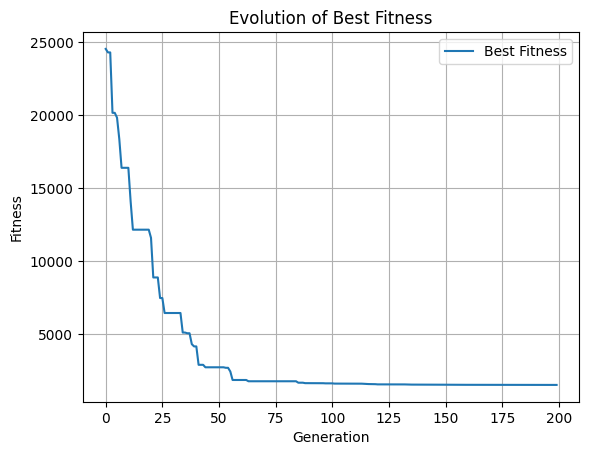

In [57]:
def objective_function(a, gamma=0.000005):
    result = 0
    for i in range(1, len(X_train)):
        #result += (y_train[i] - (a[0] + sum([a[j]*X_train[i][j] for j in range(len(X_train[i]))])))**2 
        tmp = float(y_train[i]) - a[0]
        for j in range(1, len(a)):
            tmp -= (a[j] * float(X_train[i][j]))

        result += tmp**2

    result += gamma*sum([abs(a[i]) for i in range(len(a))])

    return result


bounds = np.array([[-10, 10] for _ in range(15)])
de = DifferentialEvolution(objective_function=objective_function, bounds=bounds, epochs=200)

best_solution, best_fitness = de.fit()
print("Best solution :", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()


Best solution : [ 2.94345233  5.04520436 -4.9970828   1.03836266  4.00698882  0.98508062
  0.03955498 -1.93169866 -3.01475332  2.00150093  5.02555952  4.98198179
  0.96905486 -1.06765714  1.00405648  3.12347694]
Best fitness: 3.789515033092256


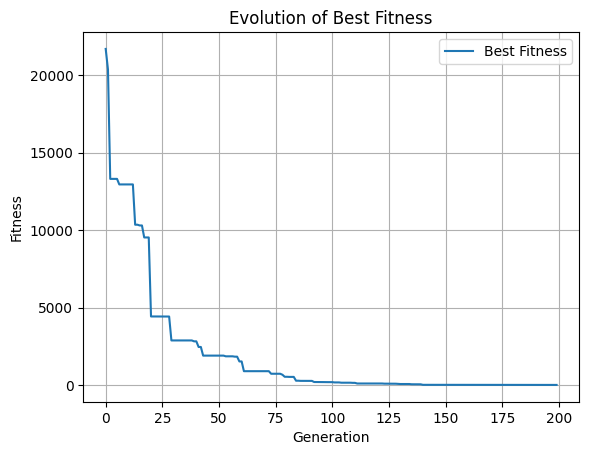

In [95]:
def objective_function(a, gamma1=0.0005, gamma2=0.0000005):
    result = 0
    for i in range(1, len(X_train)):
        tmp = float(y_train[i]) - a[0]
        for j in range(1, len(X_train[i])):
            tmp -= (a[j] * float(X_train[i][j]))

        result += tmp**2

    result += gamma1*sum([a[i]**2 for i in range(len(a))]) + gamma2*sum([abs(a[i]) for i in range(len(a))])

    return result


bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=objL2, bounds=bounds, epochs=200)

best_solution, best_fitness = de.fit()
print("Best solution :", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()


Best solution : [9.165926886851324, -4.898898377203235, 0.36137689636974635, 2.8404945424219106, 4.302483334607031, -2.6737852057528486, -1.5064891731735202, -4.897370522341337, 3.313071318484095, 4.744358459553286, 2.1921897679234075, -1.647300366461157, -0.9216932137185241, 0.026610886365359576, 3.4316974894438523]
Best fitness: 4104.235991158529


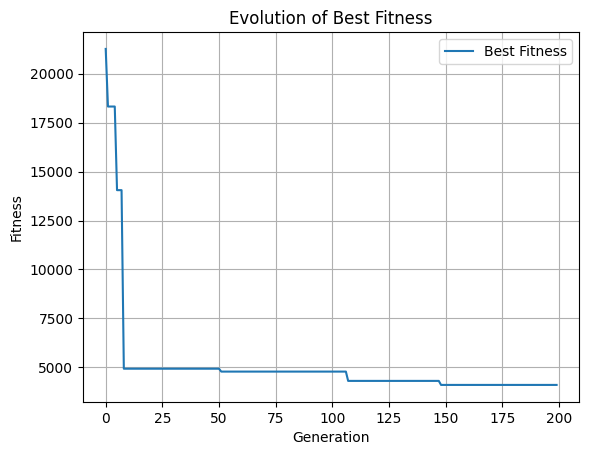

In [84]:
def objective_function(*a):
    gamma=0.0005
    result = 0
    for i in range(1, len(X_train)):
        tmp = float(y_train[i]) - a[0]
        for j in range(1, len(a)):
            tmp -= (a[j] * float(X_train[i][j]))

        result += tmp**2

    result += gamma*sum([a[i]**2 for i in range(len(a))])

    return result

bounds = np.array([[-10, 10] for _ in range(15)])

PSO = ParticleSwarmOptimizer(objective_function, [-10] * 15, [10] * 15, [1] * 15, [10] * 15, epochs=200, population_size=200, dimensions=15, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()

print("Best solution :", best_solution)
print("Best fitness:", objective_function(*best_solution))

plot_fitness(PSO._meta["best_fitness"])


Best solution : [8.657112352766973, -3.6436314155570297, 0.5359513324249594, 5.90614723317193, 0.8423579900661444, -1.2347075908286733, -1.9388855879880964, -3.7354858624921623, 0.05830759207936964, 3.41417168827987, 4.80014903410637, 0.44631982145802596, -0.4022221350686461, 1.280279340046988, 0.359337112868765]
Best fitness: 2849.4460536334846


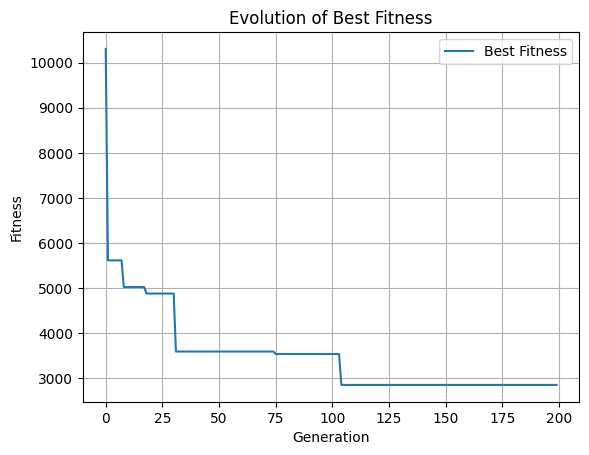

In [70]:
def objective_function(*a):
    gamma=0.0005
    result = 0
    for i in range(1, len(X_train)):
        tmp = float(y_train[i]) - a[0]
        for j in range(1, len(a)):
            tmp -= (a[j] * float(X_train[i][j]))

        result += tmp**2

    result += gamma*sum([abs(a[i]) for i in range(len(a))])

    return result

bounds = np.array([[-10, 10] for _ in range(15)])

PSO = ParticleSwarmOptimizer(objective_function, [-10] * 15, [10] * 15, [1] * 15, [10] * 15, epochs=200, population_size=200, dimensions=15, alpha1=0.5, alpha2=3)
best_solution = PSO.fit()

print("Best solution :", best_solution)
print("Best fitness:", objective_function(*best_solution))

plot_fitness(PSO._meta["best_fitness"])


In [93]:
Gamma = 0.0005

X_with_ones = np.column_stack((np.ones(X_train.shape[0]), X_train))

X_transpose = X_with_ones.T

X_transpose_X = np.dot(X_transpose, X_with_ones)
I = np.eye(X_with_ones.shape[1])

Gamma_I = Gamma * I

XtX_plus_GammaI = X_transpose_X + Gamma_I
XtX_plus_GammaI_inv = np.linalg.inv(XtX_plus_GammaI)
XtX_plus_GammaI_inv_Xt = np.dot(XtX_plus_GammaI_inv, X_transpose)

result = np.dot(XtX_plus_GammaI_inv_Xt, y_train)

print("Result:", result)
print(objective_function(result))


Result: [ 3.04605048e+00  5.00393263e+00 -4.99591682e+00  1.00112968e+00
  4.00340580e+00  1.00274404e+00 -1.22445805e-03 -1.99449553e+00
 -2.99906714e+00  2.00098743e+00  4.99862155e+00  4.99715288e+00
  9.98031370e-01 -1.00787942e+00  9.99908743e-01  2.99774528e+00]
16155.54450029567


In [94]:
def objL2(a):
    gamma=0.01
    return sum([(y_train[i] - (a[0]+sum([(a[j]*X_with_ones[i][j]) for j  in range(len(X_with_ones[0])) if j!=0])))**2 for i in range(len(y_train)) ]) + gamma*sum([(a[i])**2 for i in range(len(X_train[0]))])

objL2(result)

2.0730739908321647

In [ ]:
import numpy as np

def L2_reg(a):

    gamma = 0.00001
    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma * sum([(a[i]) ** 2 for i in range(1, len(a))])  # Exclude the bias term
    return error_term + regularization_term

objective_value = objL2(result, X_with_ones, y_train)
